In [ ]:
import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
from keras_preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
local_zip = './true.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500, 375, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [ ]:
TRAINING_DIR = "/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(500, 375),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(500, 375),
	class_mode='categorical'
)

Found 749 images belonging to 12 classes.
Found 284 images belonging to 12 classes.


In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 15))

optimizer = 'adam'

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

history = model.fit(train_generator, epochs=25, callbacks=[lr_schedule])

Epoch 1/25
24/24 [==============================] - 33s 1s/step - loss: 0.0206 - lr: 1.0000e-08
Epoch 2/25
24/24 [==============================] - 33s 1s/step - loss: 0.0211 - lr: 1.1659e-08
Epoch 3/25
24/24 [==============================] - 34s 1s/step - loss: 0.0209 - lr: 1.3594e-08
Epoch 4/25
24/24 [==============================] - 33s 1s/step - loss: 0.0208 - lr: 1.5849e-08
Epoch 5/25
24/24 [==============================] - 34s 1s/step - loss: 0.0210 - lr: 1.8478e-08
Epoch 6/25
24/24 [==============================] - 34s 1s/step - loss: 0.0214 - lr: 2.1544e-08
Epoch 7/25
24/24 [==============================] - 33s 1s/step - loss: 0.0212 - lr: 2.5119e-08
Epoch 8/25
24/24 [==============================] - 33s 1s/step - loss: 0.0209 - lr: 2.9286e-08
Epoch 9/25
24/24 [==============================] - 32s 1s/step - loss: 0.0207 - lr: 3.4145e-08
Epoch 10/25
24/24 [==============================] - 32s 1s/step - loss: 0.0206 - lr: 3.9811e-08
Epoch 11/25
24/24 [====================

(1e-09, 1e-06, 0.0, 20.0)

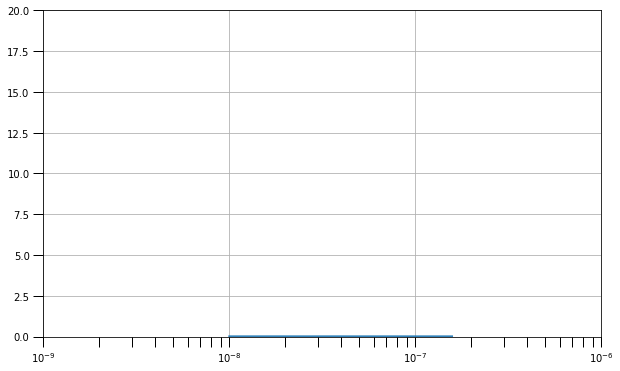

In [ ]:
lrs = 1e-8 * (10 ** (np.arange(25) / 20))

plt.figure(figsize=(10, 6))

plt.grid(True)

plt.semilogx(lrs, history.history["loss"])

plt.tick_params('both', length=10, width=1, which='both')

plt.axis([1e-9, 1e-6, 0, 20])

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 30s 1s/step - loss: 1.1984 - accuracy: 0.6071 - val_loss: 0.7894 - val_accuracy: 0.7500
Epoch 2/25
20/20 [==============================] - 29s 1s/step - loss: 0.7532 - accuracy: 0.7311 - val_loss: 0.5460 - val_accuracy: 0.8438
Epoch 3/25
20/20 [==============================] - 28s 1s/step - loss: 0.5344 - accuracy: 0.8052 - val_loss: 0.4320 - val_accuracy: 0.8333
Epoch 4/25
20/20 [==============================] - 28s 1s/step - loss: 0.3667 - accuracy: 0.8663 - val_loss: 0.5854 - val_accuracy: 0.8438
Epoch 5/25
20/20 [==============================] - 28s 1s/step - loss: 0.4887 - accuracy: 0.8277 - val_loss: 0.3738 - val_accuracy: 0.8750
Epoch 6/25
20/20 [==============================] - 28s 1s/step - loss: 0.3538 - accuracy: 0.8986 - val_loss: 0.2691 - val_accuracy: 0.9271
Epoch 7/25
20/20 [==============================] - 29s 1s/step - loss: 0.2785 - accuracy: 0.9047 - val_loss: 0.3428 - val_accuracy: 0.9167
Epoch 8/25
20/20 [==

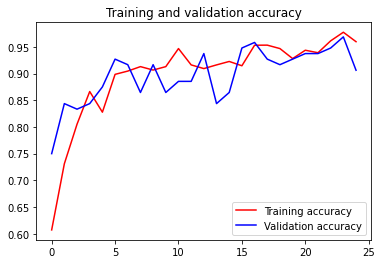

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#Predict
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(500, 375, 3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving P1010424_compressed.jpg to P1010424_compressed.jpg
P1010424_compressed.jpg
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
